In [1]:
#############################################################################
#   _________ ____________  ___                                             #
#  /   _____//  _____/\   \/  /  ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~  #
#  \_____  \/   \  ___ \     /   THE E(X)TENDED (S)ELFISH (G)ENE ALGORITHM  #
#  /        \    \_\  \/     \   ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~  #
# /_________/\________/___/\  \  https://github.com/squillero/sgx           #
#                           \_/                                             #
#                                                                           #
# A quick 'n dirty versatile population-less evolutionary optimizer loosely #
# inspired by a cool interpretation of the Darwinian theory.                #
#                                                                           #
#############################################################################

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import sys
sys.path += ['../src']
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s: %(message)s', datefmt='%H:%M:%S')
logging.getLogger().setLevel(logging.INFO)

In [27]:
from itertools import product
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm

import sgx

In [47]:
PROBLEM_SIZE = 50

In [48]:
genome = sgx.t.Genome([sgx.allele.Categorical("01") for _ in range(PROBLEM_SIZE)])
fitness_function = sgx.fitness.FitnessFunction(lambda i: i.count('1'), best_fitness=PROBLEM_SIZE, type_=sgx.fitness.Scalar)
species = sgx.t.Species(genome=genome, fitness_function=fitness_function)
archive = sgx.algorithms.sg(species, max_generation=None, progress_bar=True)

In [49]:
list(archive)

[Element(genotype=<sgx.base.Genotype object at 0x00000158ADD83B20>, fitness=50.0, generation=5708)]

In [50]:
fitness_function = sgx.fitness.FitnessFunction(lambda i: sum(i), best_fitness=PROBLEM_SIZE, type_=sgx.fitness.Scalar)

results = pd.DataFrame(columns=['Size', 'Learning Rate', 'Generations'])
for lr in tqdm(np.linspace(0.001, 0.1, 10)):
    for _ in range(2):
        data = {'Size': PROBLEM_SIZE, 'Learning Rate': lr}
        genome = sgx.t.Genome([sgx.allele.Boolean() for _ in range(PROBLEM_SIZE)])
        species = sgx.t.Species(genome=genome, fitness_function=fitness_function)
        archive = sgx.algorithms.sg(species, max_generation=None, progress_bar=False)
        
        data['Generations'] = archive.items[0].generation
        results = results.append(data, ignore_index=True)

<AxesSubplot:xlabel='Learning Rate', ylabel='Generations'>

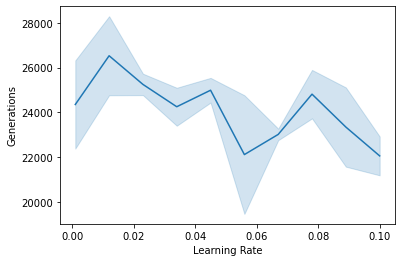

In [51]:
sns.lineplot(data=results, x='Learning Rate', y='Generations')

<AxesSubplot:>

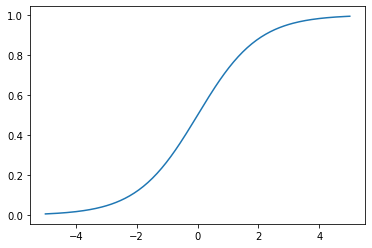

In [37]:
MIN = -5
MAX = 5
POINTS = 200
X = np.linspace(MIN, MAX, POINTS)
Y = (sgx.allele.Boolean.sigmoid(x, 1) for x in X)
sns.lineplot(x=X, y=Y)